In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import ast

df = pd.read_csv("../data/outputs/05_final_data.csv", index_col=0)
df["Countries"] = df["Countries"].apply(ast.literal_eval)
df["Books"] = df["Books"].apply(ast.literal_eval)

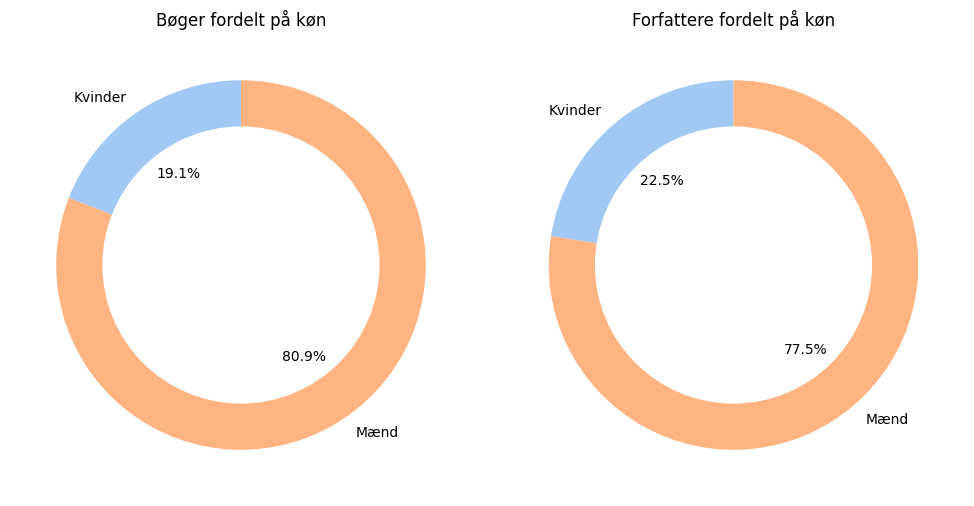

In [86]:
# create a figure with two subplots pie charts side by side
import seaborn


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
palette_color = seaborn.color_palette('pastel') 

# plot the pie chart for the first subplot
gendergrouped = df.groupby("Gender").agg({"Book Count": "sum"})
plt.title("Bøger fordelt på køn")

gendergrouped.plot.pie(
    y="Book Count",
    ax=ax[0],
    autopct="%1.1f%%",
    startangle=90,
    legend=False,
    title="Bøger fordelt på køn",
    labels=["Kvinder", "Mænd"],
    colors=palette_color,
)
# circle in the middle of the first pie chart

ax[0].add_artist(plt.Circle((0, 0), 0.75, fc="white"))
# hide y-axis label
ax[0].set_ylabel("")


# plot a pie chart for authors and gender
data = df.groupby("Gender").agg({"Gender": "count"})
data.plot.pie(
    y="Gender",
    ax=ax[1],
    autopct="%1.1f%%",
    startangle=90,
    legend=False,
    labels=["Kvinder", "Mænd"],
    title="Forfattere fordelt på køn",
    colors=palette_color,
)
ax[1].add_artist(plt.Circle((0, 0), 0.75, fc="white"))

ax[1].set_ylabel("")
fig.tight_layout()